In [42]:
import pandas as pd

In [43]:
dataset=pd.read_csv('heart.csv')

In [44]:
dataset


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

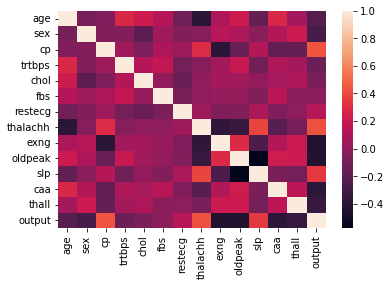

In [45]:
import seaborn as sns
sns.heatmap(dataset.corr())

In [46]:
y=dataset['output']

In [47]:
x = dataset[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

In [48]:
sex = pd.get_dummies(dataset['sex'], drop_first=True)
cp = pd.get_dummies(dataset['cp'], drop_first=True)
fbs = pd.get_dummies(dataset['fbs'], drop_first=True)
restecg = pd.get_dummies(dataset['restecg'], drop_first=True)
exng = pd.get_dummies(dataset['exng'], drop_first=True)
slp = pd.get_dummies(dataset['slp'], drop_first=True)
caa = pd.get_dummies(dataset['caa'], drop_first=True)
thall = pd.get_dummies(dataset['thall'], drop_first=True)

In [49]:
X = pd.concat([x, sex, cp, fbs, restecg, exng, slp, caa, thall ], axis=1)


In [50]:
X

,age,trtbps,chol,thalachh,oldpeak,1,1,2,3,1,...,1,1,2,1,2,3,4,1,2,3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [51]:

from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
x_train.shape

(242, 22)

In [ ]:
# Using Logistic Regression

In [36]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [37]:
model.fit(x_train,y_train)

C:\Users\Dell\Upmanyu\anaconda3\envs\arthnew\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [38]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
score=accuracy_score(y_test,y_predict)

In [41]:
score

0.8852459016393442

In [54]:
# Using Random Classifiers

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier(n_estimators=10000, max_depth=100)
rf_model
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [59]:
from sklearn.metrics import accuracy_score

In [63]:
score=accuracy_score(y_test,rf_y_pred)

In [64]:
score


0.8360655737704918

In [65]:
# Using Decision Tree Algorithm

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_y_pred=dt_model.predict(x_test)
dt_y_pred
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_y_pred))

Decision Tree Accuracy:  0.7049180327868853
